In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Tensorflow

Tensorflow is Google's library for dataflow-based mathematical computation.  
It is open-source and fast moving.

1. Automatic GPU acceleration
2. Google's support
3. Most of publicly available Deep Learning/Neural Nets code is written in Tensorflow!

**Dataflow graph**  
Tensorflow makes use of a dataflow graph with data and control nodes.  
1. First, you must define the graph using your code.

       x = Placeholder()
       y = Placeholder()
       z = x + y

2. Later, you must invoke the graph to retrieve the required information from nodes (passing in any missing information as required).

       z_value = run(z, {x: 1, y: 2}}
       print(z_value)

# Placeholders

Placeholders are essentially *inputs* that can be set for each run of the computation graph.  
Each placeholder must have a **type**.

In [2]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)
z = x+y

In [3]:
# Scalars
with tf.Session() as sess:
    a = np.array([13])
    b = np.array([10])
    print sess.run(z, {x: a, y: b})

[23]


In [4]:
# Vectors
with tf.Session() as sess:
    a = np.array([1, 2, 3])
    b = np.array([10, 20, 30])
    print sess.run(z, {x: a, y: b})

[11 22 33]


You can **specify a shape** for placeholders:

In [5]:
x = tf.placeholder(tf.int32, [1, 3])
y = tf.placeholder(tf.int32, [1, 3])
z = x + y

In [6]:
with tf.Session() as sess:
    a = np.reshape(np.array([1, 2, 3]), (1, 3))
    b = np.reshape(np.array([10, 20, 30]), (1, 3))
    print sess.run(z, {x: a, y: b})

[[11 22 33]]


In [7]:
with tf.Session() as sess:
    a = np.reshape(np.array([1, 2]), (1, 2))
    b = np.reshape(np.array([10, 20]), (1, 2))
    
    try:
        print sess.run(z, {x: a, y: b})
    except ValueError as e:
        print e

Cannot feed value of shape (1, 2) for Tensor u'Placeholder_2:0', which has shape '(1, 3)'


You could also leave it **only partially specified**:

In [8]:
x = tf.placeholder(tf.int32, [1, None])
y = tf.placeholder(tf.int32, [1, None])
z = x + y

In [9]:
with tf.Session() as sess:
    a = np.reshape(np.array([1, 2, 3]), (1, 3))
    b = np.reshape(np.array([10, 20, 30]), (1, 3))
    print sess.run(z, {x: a, y: b})

[[11 22 33]]


In [10]:
with tf.Session() as sess:
    a = np.reshape(np.array([1, 2]), (1, 2))
    b = np.reshape(np.array([10, 20]), (1, 2))
    
    print sess.run(z, {x: a, y: b})

[[11 22]]


In [11]:
with tf.Session() as sess:
    a = np.reshape(np.array([1, 2]), (2, 1))
    b = np.reshape(np.array([10, 20]), (2, 1))
    
    try:
        print sess.run(z, {x: a, y: b})
    except ValueError as e:
        print e

Cannot feed value of shape (2, 1) for Tensor u'Placeholder_4:0', which has shape '(1, ?)'


# Variables

Variables are values that persist across runs of the computation graph.  

In [12]:
initial_value = np.eye(2)
w = tf.Variable(initial_value, dtype=tf.int32)

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print sess.run(w)

[[1 0]
 [0 1]]


Control flow operation:

In [14]:
assign_op = tf.assign(w, w*2)

It's not an imperative statement!

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print sess.run(w)

[[1 0]
 [0 1]]


Control operations must also be *called*!

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print sess.run(w)
    sess.run(assign_op)
    print sess.run(w)

[[1 0]
 [0 1]]
[[2 0]
 [0 2]]


**Let's try using it as is:**  
Compute $x w$ where $x \in \mathbb{R}^{1 \times 2}$ and $w \in \mathbb{R}^{2 \times 2}$.

In [17]:
x = tf.placeholder(tf.int32, [None, 2])
initial_value = 5 * np.eye(2)
w = tf.Variable(initial_value, dtype=tf.int32)

In [18]:
result = tf.matmul(x, w)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print 'w:\n', sess.run(w), '\n'
    print 'Result:\n', sess.run(result, {x: np.array([1, 2]).reshape(1, 2)})

w:
[[5 0]
 [0 5]] 

Result:
[[ 5 10]]


# Optimization

In [20]:
initial_guess = 1003
x = tf.Variable(initial_guess, dtype=tf.float32)
f = x*x

In [21]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [22]:
print 'Initial value of x:', sess.run(x)
print 'Initial value of f:', sess.run(f)

Initial value of x: 1003.0
Initial value of f: 1.00601e+06


Create an optimizer.

In [23]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(f)

Perform stochastic gradient descent iteratively.

In [24]:
sess.run(tf.initialize_all_variables())
fval = []
xval = []

for _ in range(300):
    fval.append(sess.run(f))
    xval.append(sess.run(x))
    sess.run(optimizer)

In [25]:
print 'Final value:', xval[-1]

Final value: 2.38725


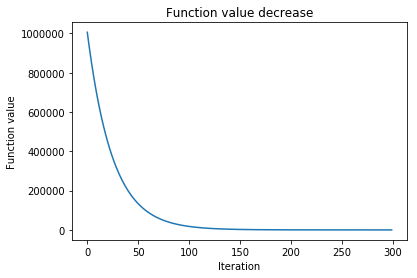

In [26]:
plt.plot(range(len(fval)), fval)
plt.xlabel('Iteration')
plt.ylabel('Function value')
_ = plt.title('Function value decrease')

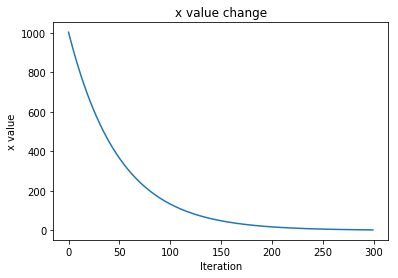

In [27]:
plt.plot(range(len(xval)), xval)
plt.xlabel('Iteration')
plt.ylabel('x value')
_ = plt.title('x value change')

Other optimizers to use:

1. `tf.train.RMSPropOptimizer`
2. `tf.train.AdadeltaOptimizer`
3. `tf.train.AdagradOptimizer`
4. `tf.train.AdamOptimizer` -- when in doubt, use this.